In [1]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tkinter
from sko.PSO import PSO
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)#控制变量

In [3]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
HeartDisease = pandas.read_csv('./processed.cleveland.csv',header=None,names=names)

In [4]:
median=HeartDisease['ca'].median()
HeartDisease['ca'].fillna(median,inplace=True)
median=HeartDisease['thal'].median()
HeartDisease['thal'].fillna(median,inplace=True)
#HeartDisease.info()

In [5]:
label = HeartDisease['num']
data = HeartDisease.drop(['num'],axis=1)

In [6]:
if data.shape[0] == label.shape[0]:
    print('Sample number is equal to label number')
else:
    print('Sample number not equal to label number')
    exit(-1)

Sample number is equal to label number


In [7]:
clf=SVC(kernel='rbf')#测试不同svm在不同核函数下的性能
acc  = cross_val_score(clf, data,label, cv=3)#使用三倍交叉验证求准确率，后续同
print(np.mean(acc))

0.6171617161716171


In [8]:
clf = SVC(kernel='poly')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.6600660066006601


In [9]:
clf = SVC(kernel='sigmoid')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.5445544554455446


In [10]:
clf = SVC(kernel='linear')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.8283828382838284


In [11]:
def plots(position):#定义函数用于生成粒子的位置图
    x = []
    y = []
    for i in range(0,len(position)):
        x.append(position[i][0])
        y.append(position[i][1])
    plt.scatter(x, y, alpha = 0.5,c=var.score,cmap='viridis')  #生成散点图，颜色随准对于位置确度变化，透明度设置为0.5
    plt.colorbar()
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([-0.1,1,-1,11])#定义横坐标和纵坐标的范围
    return plt.show()

In [12]:
class var:
    count=0
    bestsocre=0.0
    bestpos=[]
    tu=[]
    score=[]

In [13]:
def func(x):#定义函数，用于计算损失率
    x1,x2=x
    clf = SVC
    socre = cross_val_score(clf(kernel='linear',C=x1, gamma=x2),data, label, cv=3).mean()
    if(socre>var.bestsocre):
        var.bestsocre=socre
        var.bestpos=x
    if var.count%psovar.pop==0:
        print('iter', int(var.count / psovar.pop), 'of', psovar.max_iter)#输出当前轮次
    print(x,socre)
    var.tu.append(x)
    var.score.append(socre)
    if var.count%psovar.pop==psovar.pop-1:#输出每一轮粒子的信息
        print('best position is',var.bestpos,'best score is',var.bestsocre)
        var.bestsocre=0
        plots(var.tu)
        var.score=[]
        var.tu=[]
    var.count+=1
    return 1-socre#返回损失率

In [14]:
class psovar:#pso算法的各种参数
    max_iter=50#迭代次数
    pop=10#粒子数
    n_dim=2#需要求解的维数
    w=0.7#惯性系数，这个数越大，代表着它不容易更改之前的运动路线，更倾向于探索未知领域。
    c1=0.2#个体加速因子
    c2=0.5#社会加速因子
    lb=[0.001, 0.01]#求解未知数下界
    ub=[1, 10]#求解未知数上界

iter 0 of 50
[0.18707395 3.46215166] 0.834983498349835
[0.39737071 5.39277917] 0.8415841584158416
[0.41977532 6.85534281] 0.834983498349835
[0.2052478  8.78239319] 0.834983498349835
[0.02836021 6.70797043] 0.8283828382838284
[0.4178875  5.59131139] 0.834983498349835
[0.14124655 1.98903388] 0.834983498349835
[0.80094382 9.68293314] 0.821782178217822
[0.31411075 6.92630293] 0.8415841584158416
[0.87651276 8.94712057] 0.8250825082508251
best position is [0.39737071 5.39277917] best score is 0.8415841584158416


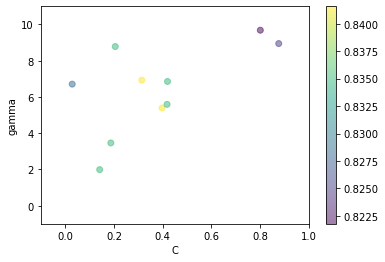

iter 1 of 50
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.66171053e+00] 0.712871287128713
[0.92940269 8.46714385] 0.8250825082508251
[0.40566945 4.11203827] 0.834983498349835
[ 0.66019625 10.        ] 0.8283828382838284
[1.0000000e-03 6.3945751e+00] 0.712871287128713
[ 1. 10.] 0.8283828382838284
[ 0.02561035 10.        ] 0.8250825082508252
[0.16802054 7.80786696] 0.834983498349835
best position is [0.40566945 4.11203827] best score is 0.834983498349835


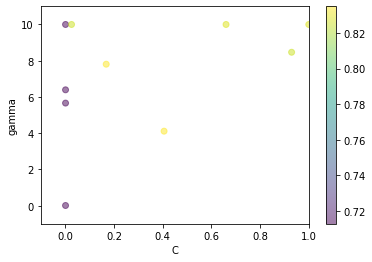

iter 2 of 50
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 4.72043749e+00] 0.712871287128713
[1.         7.98223754] 0.8283828382838284
[0.66978593 2.29488577] 0.8283828382838284
[ 0.80108783 10.        ] 0.821782178217822
[1.00000000e-03 9.46412421e+00] 0.712871287128713
[1.         8.55460737] 0.8283828382838284
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.63586297e+00] 0.712871287128713
best position is [1.         7.98223754] best score is 0.8283828382838284


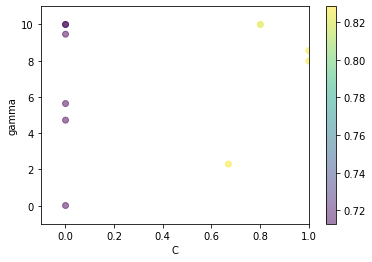

iter 3 of 50
[0.001 0.01 ] 0.712871287128713
[0.05169285 8.44805351] 0.8382838283828383
[1.00000000e-03 4.18328848e+00] 0.712871287128713
[1.         6.44927554] 0.8283828382838284
[0.70979297 2.11504502] 0.8250825082508251
[0.78373414 8.22124981] 0.821782178217822
[1.e-03 1.e+01] 0.712871287128713
[1.         6.25640469] 0.8283828382838284
[0.04954402 8.83652098] 0.8415841584158416
[1.0000000e-03 3.9289759e+00] 0.712871287128713
best position is [0.04954402 8.83652098] best score is 0.8415841584158416


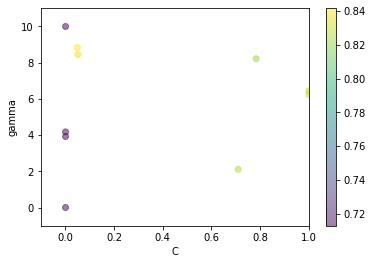

iter 4 of 50
[1.00000000e-03 1.48102251e+00] 0.712871287128713
[0.08644824 7.54011442] 0.8415841584158416
[1.00000000e-03 6.24137411e+00] 0.712871287128713
[1.         6.62613153] 0.8283828382838284
[0.50834679 5.01397393] 0.8316831683168316
[0.56022901 7.3804743 ] 0.8316831683168316
[1.00000000e-03 9.73807819e+00] 0.712871287128713
[0.74935303 6.42346036] 0.821782178217822
[0.08352483 8.02208566] 0.8415841584158416
[1.00000000e-03 4.00074117e+00] 0.712871287128713
best position is [0.08644824 7.54011442] best score is 0.8415841584158416


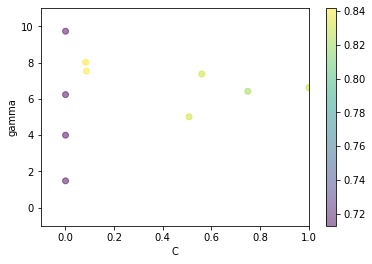

iter 5 of 50
[1.00000000e-03 4.84757442e+00] 0.712871287128713
[0.10026864 7.00889927] 0.8316831683168316
[4.06399075e-03 8.06874075e+00] 0.7689768976897691
[0.90214373 7.56004273] 0.8250825082508251
[0.2806439  8.70091169] 0.8382838283828383
[0.17150682 6.97911957] 0.834983498349835
[1.00000000e-03 9.23859317e+00] 0.712871287128713
[0.40251269 7.68979219] 0.834983498349835
[0.10323293 7.71307278] 0.8316831683168316
[0.0072495  5.67462291] 0.7854785478547855
best position is [0.2806439  8.70091169] best score is 0.8382838283828383


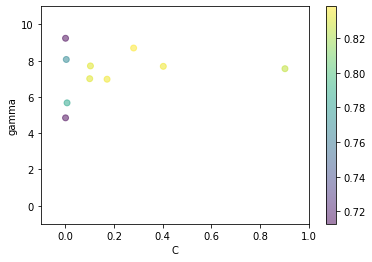

iter 6 of 50
[1.00000000e-03 7.24942211e+00] 0.712871287128713
[0.08775574 7.59935809] 0.8382838283828383
[0.01303644 9.40279592] 0.8052805280528054
[0.46559051 8.63154558] 0.8316831683168316
[8.62068894e-03 1.00000000e+01] 0.7920792079207922
[1.00000000e-03 7.20530759e+00] 0.712871287128713
[1.00000000e-03 8.84206353e+00] 0.712871287128713
[0.09694806 8.59125726] 0.8316831683168316
[0.1099343  7.97336695] 0.8316831683168316
[0.03259824 7.57314684] 0.8283828382838285
best position is [0.08775574 7.59935809] best score is 0.8382838283828383


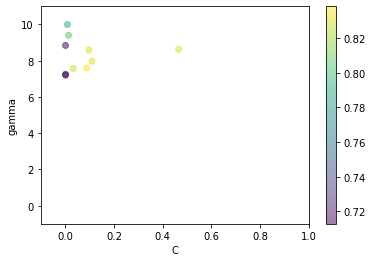

iter 7 of 50
[0.01018118 9.13740504] 0.7920792079207922
[0.06567652 8.47961198] 0.8382838283828383
[ 0.02556823 10.        ] 0.8250825082508252
[0.07080938 9.46604845] 0.8448844884488449
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.37712921e+00] 0.712871287128713
[1.00000000e-03 8.33560476e+00] 0.712871287128713
[1.00000000e-03 9.18576715e+00] 0.712871287128713
[0.0886064  8.34004618] 0.8382838283828383
[0.06827999 9.19300965] 0.8415841584158416
best position is [0.07080938 9.46604845] best score is 0.8448844884488449


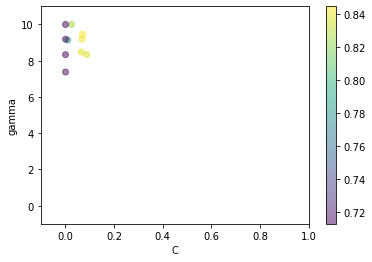

iter 8 of 50
[ 0.04638911 10.        ] 0.8415841584158416
[0.05219534 9.22125317] 0.8382838283828383
[ 0.05494269 10.        ] 0.8382838283828383
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.39612734e+00] 0.712871287128713
[1.00000000e-03 8.20883178e+00] 0.712871287128713
[1.00000000e-03 9.47924445e+00] 0.712871287128713
[0.06756009 9.01156412] 0.8415841584158416
[ 0.09382994 10.        ] 0.8316831683168316
best position is [ 0.04638911 10.        ] best score is 0.8415841584158416


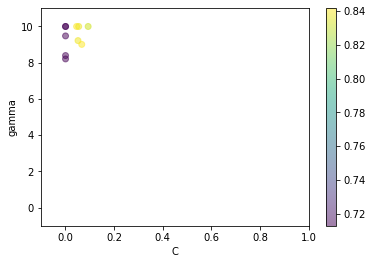

iter 9 of 50
[ 0.07899203 10.        ] 0.8415841584158416
[0.05234663 9.6091811 ] 0.8382838283828383
[ 0.07576206 10.        ] 0.8415841584158416
[1.e-03 1.e+01] 0.712871287128713
[5.72612399e-03 1.00000000e+01] 0.778877887788779
[1.00000000e-03 9.61368522e+00] 0.712871287128713
[0.02516395 8.39724296] 0.8250825082508252
[1.00000000e-03 9.49451539e+00] 0.712871287128713
[0.05297288 9.46463183] 0.8382838283828383
[ 0.1025583 10.       ] 0.8316831683168316
best position is [ 0.07899203 10.        ] best score is 0.8415841584158416


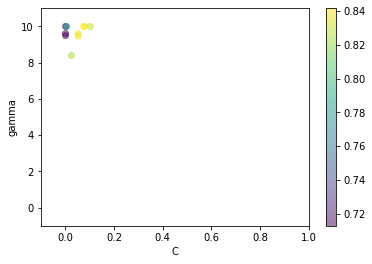

iter 10 of 50
[ 0.0974028 10.       ] 0.8316831683168316
[0.06390619 9.80157387] 0.8382838283828383
[ 0.0882163 10.       ] 0.8382838283828383
[1.e-03 1.e+01] 0.712871287128713
[0.07118988 9.83934092] 0.8448844884488449
[0.0145737  9.95786419] 0.8052805280528054
[0.04695578 8.93916974] 0.8415841584158416
[0.04993276 9.18460227] 0.8415841584158416
[0.04883177 9.70038789] 0.8415841584158416
[ 0.10065059 10.        ] 0.8316831683168316
best position is [0.07118988 9.83934092] best score is 0.8448844884488449


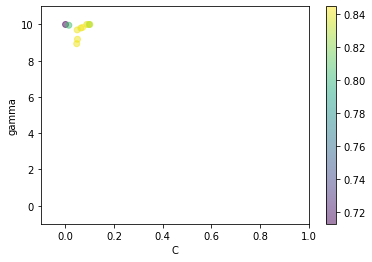

iter 11 of 50
[0.09114059 9.98352801] 0.8382838283828383
[0.07562191 9.74794406] 0.8415841584158416
[0.09401447 9.86145792] 0.8316831683168316
[1.00000000e-03 9.89795064e+00] 0.712871287128713
[0.11695742 9.71192852] 0.8382838283828383
[0.07240242 9.99532097] 0.8448844884488449
[0.06853958 9.44868815] 0.8415841584158416
[0.08556523 8.99671594] 0.8415841584158416
[0.04687689 9.69563688] 0.8415841584158416
[ 0.09154684 10.        ] 0.8382838283828383
best position is [0.07240242 9.99532097] best score is 0.8448844884488449


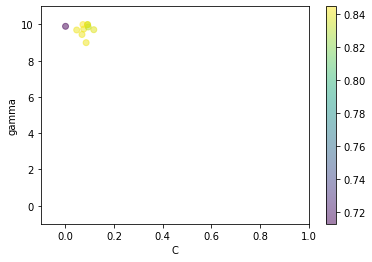

iter 12 of 50
[0.07265619 9.81391711] 0.8448844884488449
[0.0847223  9.60338715] 0.8415841584158416
[0.09489679 9.62676407] 0.8316831683168316
[1.00000000e-03 9.70929471e+00] 0.712871287128713
[0.1396457  9.62081764] 0.834983498349835
[0.11264189 9.78785936] 0.8316831683168316
[0.08023324 9.72041687] 0.8415841584158416
[0.10429303 8.95269837] 0.8316831683168316
[0.05323132 9.52098887] 0.8382838283828383
[0.07868754 9.7877796 ] 0.8415841584158416
best position is [0.07265619 9.81391711] best score is 0.8448844884488449


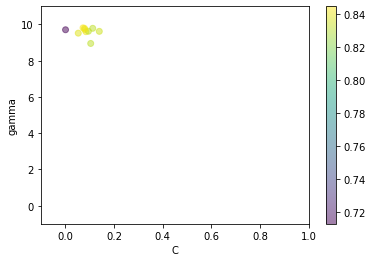

iter 13 of 50
[0.05964535 9.63916009] 0.8382838283828383
[0.08477538 9.29331647] 0.8415841584158416
[0.08369966 9.45619339] 0.8415841584158416
[0.01536523 9.51824176] 0.8085808580858087
[0.11499288 9.54269376] 0.8382838283828383
[0.13643462 9.52852324] 0.834983498349835
[0.08252228 9.73862214] 0.8415841584158416
[0.09718598 9.07333237] 0.8316831683168316
[0.06322599 9.27308858] 0.8382838283828383
[0.06767735 9.49104703] 0.8415841584158416
best position is [0.08477538 9.29331647] best score is 0.8415841584158416


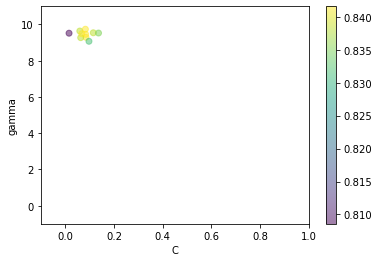

iter 14 of 50
[0.0530235  9.47576608] 0.8382838283828383
[0.0815421  9.06548953] 0.8415841584158416
[0.0694899  9.44376895] 0.8448844884488449
[0.04519992 9.35080865] 0.8415841584158416
[0.08230597 9.47493254] 0.8415841584158416
[0.13295379 9.38581399] 0.8382838283828383
[0.07833506 9.59349432] 0.8415841584158416
[0.08793793 9.24755932] 0.8382838283828383
[0.07287692 9.07176397] 0.8448844884488449
[0.06122369 9.23297074] 0.8382838283828383
best position is [0.0694899  9.44376895] best score is 0.8448844884488449


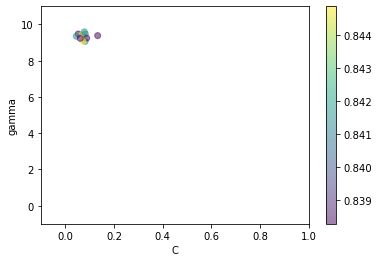

iter 15 of 50
[0.05690631 9.36980547] 0.8382838283828383
[0.07875599 8.84339779] 0.8415841584158416
[0.06019395 9.44563565] 0.8382838283828383
[0.07671497 9.25223387] 0.8415841584158416
[0.05464566 9.43675816] 0.8382838283828383
[0.11180767 9.33501278] 0.8316831683168316
[0.06784892 9.33300686] 0.8415841584158416
[0.07178859 9.42516699] 0.8448844884488449
[0.07867664 8.94359973] 0.8415841584158416
[0.06187657 9.05162274] 0.8382838283828383
best position is [0.07178859 9.42516699] best score is 0.8448844884488449


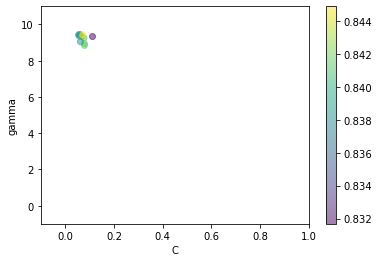

iter 16 of 50
[0.06819726 9.30097216] 0.8415841584158416
[0.07574379 8.60621393] 0.8415841584158416
[0.05714455 9.44862229] 0.8382838283828383
[0.09646067 9.30818896] 0.8316831683168316
[0.04559524 9.44599177] 0.8415841584158416
[0.07637938 9.4233894 ] 0.8415841584158416
[0.05752575 9.15786538] 0.8382838283828383
[0.06041022 9.55704316] 0.8382838283828383
[0.0821265  9.06813763] 0.8415841584158416
[0.06517669 9.02833517] 0.8382838283828383
best position is [0.06819726 9.30097216] best score is 0.8415841584158416


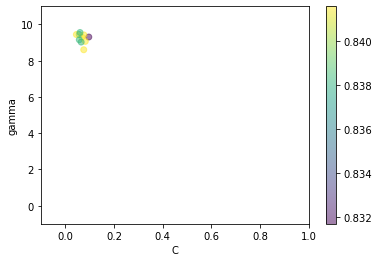

iter 17 of 50
[0.07726502 9.35148987] 0.8415841584158416
[0.07307593 8.41639619] 0.8448844884488449
[0.05738622 9.45456121] 0.8382838283828383
[0.10469165 9.42186233] 0.8316831683168316
[0.04747263 9.4878467 ] 0.8415841584158416
[0.04856184 9.50289164] 0.8415841584158416
[0.05580203 9.07361613] 0.8382838283828383
[0.05412802 9.61722581] 0.8382838283828383
[0.0806981  9.19934279] 0.8415841584158416
[0.06972403 9.07600465] 0.8448844884488449
best position is [0.07307593 8.41639619] best score is 0.8448844884488449


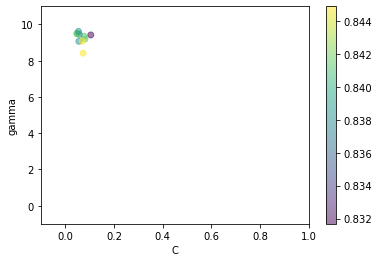

iter 18 of 50
[0.08270081 9.46793281] 0.8415841584158416
[0.07114914 8.60110488] 0.8448844884488449
[0.06178082 9.46034426] 0.8382838283828383
[0.09803483 9.52690154] 0.8316831683168316
[0.05631189 9.53179376] 0.8382838283828383
[0.03899912 9.57815051] 0.8415841584158416
[0.06070531 9.18273815] 0.8382838283828383
[0.05252288 9.62504972] 0.8382838283828383
[0.07818402 9.333739  ] 0.8415841584158416
[0.07337594 9.12529175] 0.8448844884488449
best position is [0.07114914 8.60110488] best score is 0.8448844884488449


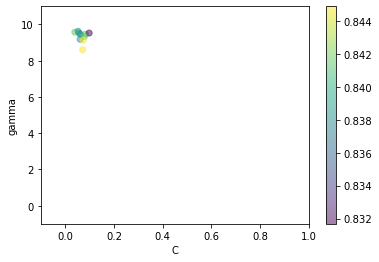

iter 19 of 50
[0.0792826  9.59659699] 0.8415841584158416
[0.06968504 9.07958687] 0.8448844884488449
[0.06813577 9.46409391] 0.8415841584158416
[0.08220966 9.57833332] 0.8415841584158416
[0.07048416 9.6033888 ] 0.8448844884488449
[0.04672298 9.60990114] 0.8415841584158416
[0.06240246 9.26115755] 0.8382838283828383
[0.05889562 9.60156451] 0.8415841584158416
[0.07562639 9.39279894] 0.8415841584158416
[0.07454009 9.26175666] 0.8415841584158416
best position is [0.06968504 9.07958687] best score is 0.8448844884488449


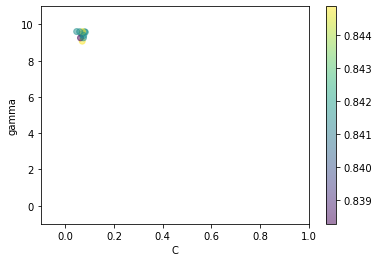

iter 20 of 50
[0.07360801 9.68326369] 0.8448844884488449
[0.06954851 9.34891073] 0.8448844884488449
[0.07307928 9.46658205] 0.8448844884488449
[0.06809404 9.5716288 ] 0.8415841584158416
[0.08053579 9.67639872] 0.8415841584158416
[0.06400987 9.59339179] 0.8382838283828383
[0.06454381 9.39227426] 0.8382838283828383
[0.06461566 9.55173195] 0.8382838283828383
[0.07221413 9.42139965] 0.8448844884488449
[0.07423536 9.39471397] 0.8415841584158416
best position is [0.07360801 9.68326369] best score is 0.8448844884488449


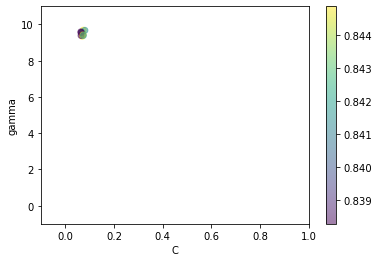

iter 21 of 50
[0.06880382 9.72513579] 0.8415841584158416
[0.07005021 9.55367015] 0.8448844884488449
[0.07560439 9.46535547] 0.8415841584158416
[0.05982097 9.53915276] 0.8382838283828383
[0.08408518 9.6405908 ] 0.8415841584158416
[0.07714285 9.54185803] 0.8415841584158416
[0.066551   9.44930279] 0.8415841584158416
[0.07172561 9.49373385] 0.8448844884488449
[0.06983104 9.42564467] 0.8448844884488449
[0.07178962 9.47521461] 0.8415841584158416
best position is [0.07005021 9.55367015] best score is 0.8448844884488449


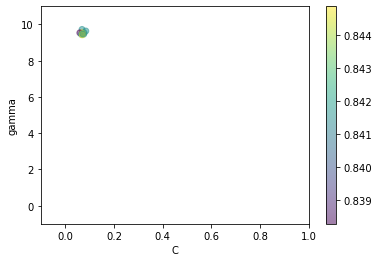

iter 22 of 50
[0.06665171 9.69646462] 0.8415841584158416
[0.07108155 9.6630238 ] 0.8448844884488449
[0.07634339 9.46255447] 0.8415841584158416
[0.05638032 9.47224743] 0.8382838283828383
[0.07951774 9.57110492] 0.8415841584158416
[0.0845976  9.55703535] 0.8415841584158416
[0.06892446 9.4084899 ] 0.8415841584158416
[0.0765787  9.43093023] 0.8415841584158416
[0.06856857 9.36962229] 0.8415841584158416
[0.06990217 9.51253323] 0.8448844884488449
best position is [0.07108155 9.6630238 ] best score is 0.8448844884488449


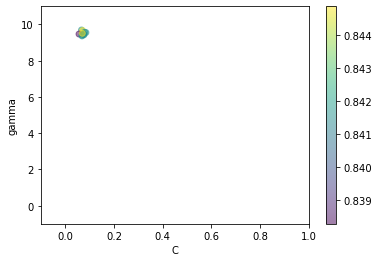

iter 23 of 50
[0.06796208 9.64233901] 0.8415841584158416
[0.07193319 9.57884274] 0.8415841584158416
[0.07407785 9.46096275] 0.8415841584158416
[0.05893299 9.42287521] 0.8415841584158416
[0.07537966 9.53404716] 0.8415841584158416
[0.08579274 9.59910909] 0.8415841584158416
[0.07145268 9.32755084] 0.8448844884488449
[0.0783602  9.40058443] 0.8415841584158416
[0.06855829 9.33837725] 0.8415841584158416
[0.06886339 9.4434806 ] 0.8415841584158416
best position is [0.07145268 9.32755084] best score is 0.8448844884488449


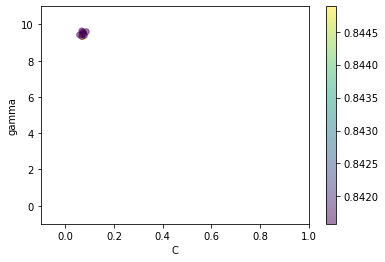

iter 24 of 50
[0.0706479 9.5262165] 0.8448844884488449
[0.07243252 9.45736581] 0.8448844884488449
[0.07223712 9.46006404] 0.8448844884488449
[0.06404681 9.39178721] 0.8382838283828383
[0.07139875 9.51063416] 0.8448844884488449
[0.07938727 9.66756324] 0.8415841584158416
[0.07304583 9.32636141] 0.8448844884488449
[0.07626307 9.41320963] 0.8415841584158416
[0.06912018 9.31508205] 0.8448844884488449
[0.06913619 9.3350039 ] 0.8448844884488449
best position is [0.0706479 9.5262165] best score is 0.8448844884488449


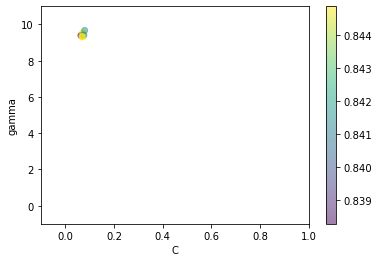

iter 25 of 50
[0.07270011 9.43816633] 0.8448844884488449
[0.07252949 9.22388502] 0.8448844884488449
[0.07022734 9.46024655] 0.8448844884488449
[0.06913723 9.37376038] 0.8448844884488449
[0.06852067 9.53318696] 0.8415841584158416
[0.07265388 9.68702441] 0.8415841584158416
[0.07301406 9.33802475] 0.8448844884488449
[0.07161924 9.44967735] 0.8448844884488449
[0.07071724 9.2553088 ] 0.8448844884488449
[0.06947973 9.23261606] 0.8448844884488449
best position is [0.07270011 9.43816633] best score is 0.8448844884488449


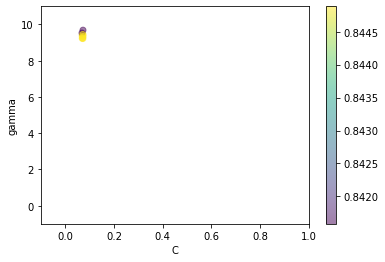

iter 26 of 50
[0.07330715 9.38757554] 0.8448844884488449
[0.07208055 8.90775137] 0.8448844884488449
[0.06892874 9.45988814] 0.8415841584158416
[0.07382115 9.37862441] 0.8448844884488449
[0.06687871 9.59532554] 0.8415841584158416
[0.06786489 9.71251048] 0.8415841584158416
[0.07234369 9.34876549] 0.8415841584158416
[0.06827091 9.48003262] 0.8415841584158416
[0.07192017 9.23464211] 0.8448844884488449
[0.07014657 9.18738624] 0.8448844884488449
best position is [0.07330715 9.38757554] best score is 0.8448844884488449


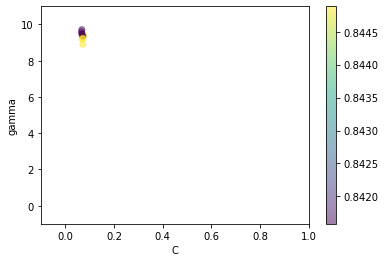

iter 27 of 50
[0.07285067 9.42869872] 0.8448844884488449
[0.07169041 8.82266386] 0.8448844884488449
[0.06829234 9.45670831] 0.8415841584158416
[0.07650238 9.43137483] 0.8415841584158416
[0.06831    9.62711327] 0.8415841584158416
[0.06648177 9.66305072] 0.8415841584158416
[0.07146367 9.38347928] 0.8448844884488449
[0.06707316 9.49507237] 0.8415841584158416
[0.07290838 9.24253512] 0.8448844884488449
[0.07058541 9.24435389] 0.8448844884488449
best position is [0.07285067 9.42869872] best score is 0.8448844884488449


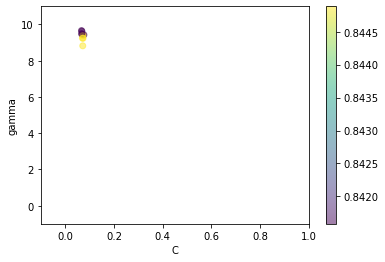

iter 28 of 50
[0.07150777 9.4974161 ] 0.8448844884488449
[0.0713104  8.88500889] 0.8448844884488449
[0.06924212 9.45261202] 0.8448844884488449
[0.07737899 9.48463567] 0.8415841584158416
[0.07010939 9.60700562] 0.8448844884488449
[0.0674035  9.59644307] 0.8415841584158416
[0.07081087 9.40361974] 0.8448844884488449
[0.06789322 9.48807131] 0.8415841584158416
[0.07350538 9.26135669] 0.8448844884488449
[0.0709193  9.29923659] 0.8448844884488449
best position is [0.07150777 9.4974161 ] best score is 0.8448844884488449


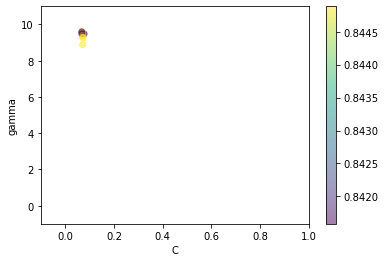

iter 29 of 50
[0.07035318 9.57675055] 0.8448844884488449
[0.07119733 9.02726463] 0.8448844884488449
[0.07070686 9.45013533] 0.8448844884488449
[0.07388005 9.5189248 ] 0.8415841584158416
[0.07157938 9.59046246] 0.8448844884488449
[0.06906077 9.57219859] 0.8448844884488449
[0.07037524 9.43254813] 0.8448844884488449
[0.06950567 9.47794013] 0.8448844884488449
[0.07266841 9.30059764] 0.8448844884488449
[0.07094542 9.34604085] 0.8448844884488449
best position is [0.07035318 9.57675055] best score is 0.8448844884488449


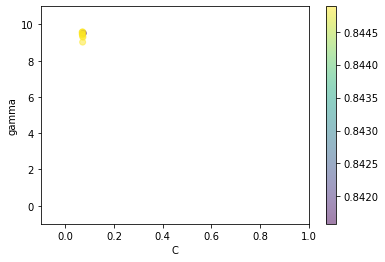

iter 30 of 50
[0.06996283 9.605886  ] 0.8448844884488449
[0.07117802 9.2241822 ] 0.8448844884488449
[0.07157836 9.44895528] 0.8448844884488449
[0.07108813 9.52871846] 0.8448844884488449
[0.07248628 9.56100636] 0.8448844884488449
[0.07039866 9.62190456] 0.8448844884488449
[0.07042284 9.45333212] 0.8448844884488449
[0.0711257  9.45628175] 0.8448844884488449
[0.07205216 9.37763015] 0.8448844884488449
[0.0707689  9.38665116] 0.8448844884488449
best position is [0.06996283 9.605886  ] best score is 0.8448844884488449


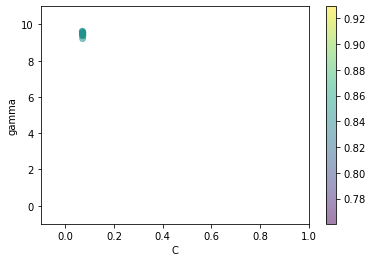

iter 31 of 50
[0.07019538 9.59642085] 0.8448844884488449
[0.07125653 9.45293038] 0.8448844884488449
[0.07172833 9.45610421] 0.8448844884488449
[0.06903211 9.51987613] 0.8448844884488449
[0.07298255 9.54829815] 0.8448844884488449
[0.07144196 9.66911582] 0.8448844884488449
[0.07077173 9.46264441] 0.8448844884488449
[0.07228007 9.44176045] 0.8448844884488449
[0.07107421 9.40682129] 0.8448844884488449
[0.07061178 9.40816434] 0.8448844884488449
best position is [0.07019538 9.59642085] best score is 0.8448844884488449


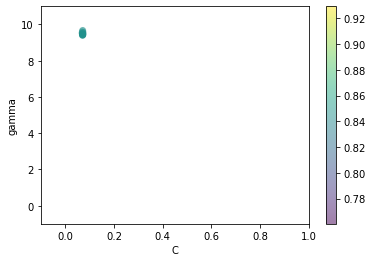

iter 32 of 50
[0.07065194 9.55059772] 0.8448844884488449
[0.07124881 9.47123172] 0.8448844884488449
[0.07115612 9.46275854] 0.8448844884488449
[0.06861945 9.48962924] 0.8415841584158416
[0.07211497 9.5833668 ] 0.8448844884488449
[0.07212934 9.63541921] 0.8448844884488449
[0.07108719 9.45685189] 0.8448844884488449
[0.07227711 9.43177493] 0.8448844884488449
[0.07051778 9.41835329] 0.8448844884488449
[0.07042627 9.38621978] 0.8448844884488449
best position is [0.07065194 9.55059772] best score is 0.8448844884488449


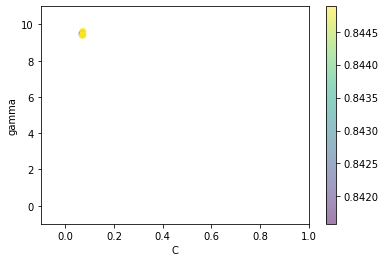

iter 33 of 50
[0.07128615 9.53471807] 0.8448844884488449
[0.07106728 9.32983128] 0.8448844884488449
[0.07064105 9.46602238] 0.8448844884488449
[0.06956299 9.45902279] 0.8448844884488449
[0.07121786 9.60658866] 0.8448844884488449
[0.07202336 9.65450473] 0.8448844884488449
[0.07119828 9.44221041] 0.8448844884488449
[0.07189931 9.42466131] 0.8448844884488449
[0.07026915 9.40340873] 0.8448844884488449
[0.07020433 9.35320457] 0.8448844884488449
best position is [0.07128615 9.53471807] best score is 0.8448844884488449


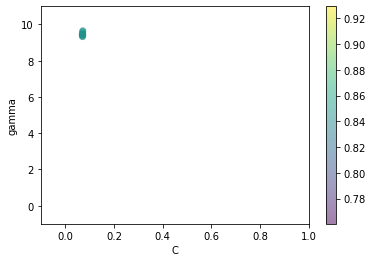

iter 34 of 50
[0.0718912  9.49943989] 0.8448844884488449
[0.07120655 9.18236738] 0.8448844884488449
[0.07007066 9.46732305] 0.8448844884488449
[0.07086617 9.44094785] 0.8448844884488449
[0.07049213 9.62061372] 0.8448844884488449
[0.07163219 9.6730189 ] 0.8448844884488449
[0.07128654 9.42872908] 0.8448844884488449
[0.07153456 9.42086606] 0.8448844884488449
[0.07025361 9.40522342] 0.8448844884488449
[0.07014634 9.29179715] 0.8448844884488449
best position is [0.0718912  9.49943989] best score is 0.8448844884488449


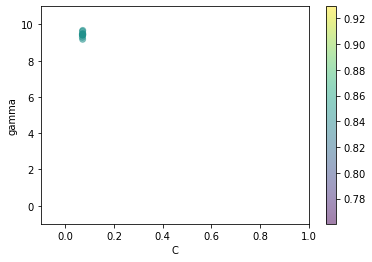

iter 35 of 50
[0.07192389 9.47472544] 0.8448844884488449
[0.07133597 8.97809016] 0.8448844884488449
[0.06971564 9.46356021] 0.8448844884488449
[0.07175901 9.43739681] 0.8448844884488449
[0.07019512 9.59367471] 0.8448844884488449
[0.07100742 9.63133793] 0.8448844884488449
[0.07115002 9.41917795] 0.8448844884488449
[0.07094415 9.43201711] 0.8448844884488449
[0.07076119 9.37076318] 0.8448844884488449
[0.07025834 9.24762612] 0.8448844884488449
best position is [0.07192389 9.47472544] best score is 0.8448844884488449


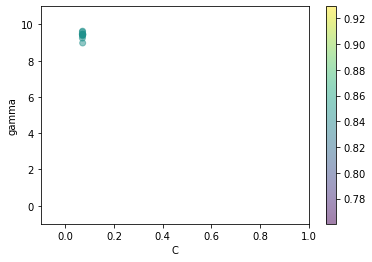

iter 36 of 50
[0.07152222 9.47293895] 0.8448844884488449
[0.07138077 8.90952707] 0.8448844884488449
[0.06984905 9.46015219] 0.8448844884488449
[0.07207571 9.44205689] 0.8448844884488449
[0.07016629 9.58412856] 0.8448844884488449
[0.07059447 9.61300344] 0.8448844884488449
[0.07090762 9.39814809] 0.8448844884488449
[0.07056374 9.45024815] 0.8448844884488449
[0.07139188 9.37841883] 0.8448844884488449
[0.07041974 9.25646906] 0.8448844884488449
best position is [0.07152222 9.47293895] best score is 0.8448844884488449


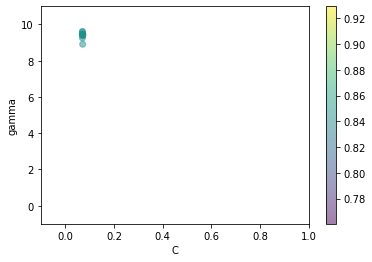

iter 37 of 50
[0.07128509 9.51930511] 0.8448844884488449
[0.0717038 8.9166126] 0.8448844884488449
[0.06994576 9.45870431] 0.8448844884488449
[0.07208778 9.45265785] 0.8448844884488449
[0.07035968 9.59876419] 0.8448844884488449
[0.07056646 9.58378154] 0.8448844884488449
[0.07073751 9.37641953] 0.8448844884488449
[0.07045045 9.46138762] 0.8448844884488449
[0.07193233 9.38169476] 0.8448844884488449
[0.07056708 9.3316877 ] 0.8448844884488449
best position is [0.07128509 9.51930511] best score is 0.8448844884488449


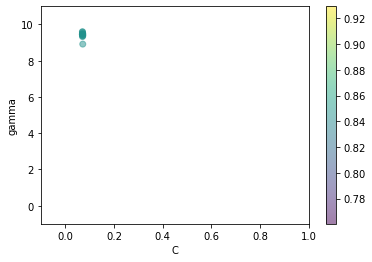

iter 38 of 50
[0.07116422 9.58580791] 0.8448844884488449
[0.07179111 9.11085594] 0.8448844884488449
[0.07014659 9.45648354] 0.8448844884488449
[0.07149747 9.46741821] 0.8448844884488449
[0.07067114 9.59046019] 0.8448844884488449
[0.07099614 9.57629397] 0.8448844884488449
[0.0706878  9.38470977] 0.8448844884488449
[0.07075366 9.4703871 ] 0.8448844884488449
[0.07242891 9.38352738] 0.8448844884488449
[0.07059875 9.41500549] 0.8448844884488449
best position is [0.07116422 9.58580791] best score is 0.8448844884488449


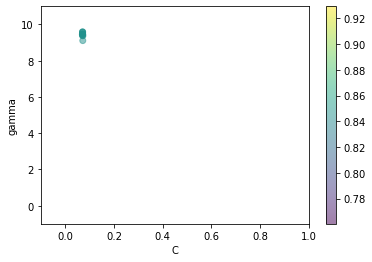

iter 39 of 50
[0.07119335 9.61505021] 0.8448844884488449
[0.07183475 9.2498504 ] 0.8448844884488449
[0.07031924 9.45500338] 0.8448844884488449
[0.07081558 9.47750282] 0.8448844884488449
[0.07100569 9.56048003] 0.8448844884488449
[0.07124216 9.58107918] 0.8448844884488449
[0.07081963 9.41029098] 0.8448844884488449
[0.07101978 9.4709554 ] 0.8448844884488449
[0.07236843 9.35299346] 0.8448844884488449
[0.07065326 9.43580545] 0.8448844884488449
best position is [0.07119335 9.61505021] best score is 0.8448844884488449


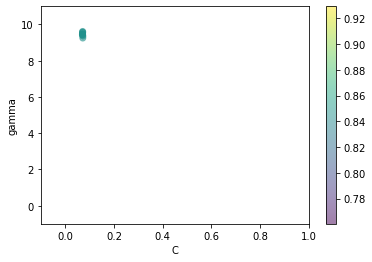

iter 40 of 50
[0.07146083 9.62300239] 0.8448844884488449
[0.07198632 9.28259914] 0.8448844884488449
[0.0705345  9.45540256] 0.8448844884488449
[0.07033603 9.47930796] 0.8448844884488449
[0.0712441  9.54679353] 0.8448844884488449
[0.07141248 9.54335738] 0.8448844884488449
[0.07096035 9.42959691] 0.8448844884488449
[0.07126555 9.46950432] 0.8448844884488449
[0.07236334 9.30977767] 0.8448844884488449
[0.07059382 9.45570907] 0.8448844884488449
best position is [0.07146083 9.62300239] best score is 0.8448844884488449


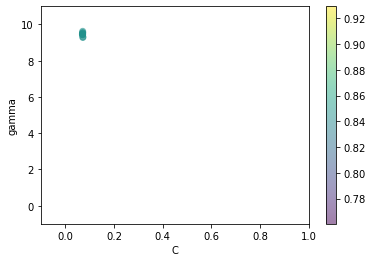

iter 41 of 50
[0.07154819 9.58776938] 0.8448844884488449
[0.07182898 9.27549646] 0.8448844884488449
[0.07074858 9.45926993] 0.8448844884488449
[0.07016144 9.47920485] 0.8448844884488449
[0.07123054 9.53115086] 0.8448844884488449
[0.07152598 9.56912001] 0.8448844884488449
[0.07111801 9.45640207] 0.8448844884488449
[0.07150893 9.46261845] 0.8448844884488449
[0.07198074 9.28879767] 0.8448844884488449
[0.0704277 9.4213595] 0.8448844884488449
best position is [0.07154819 9.58776938] best score is 0.8448844884488449


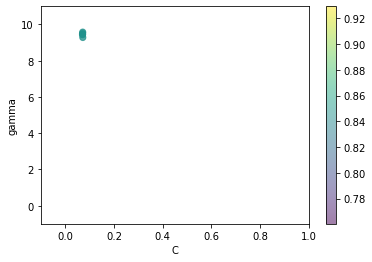

iter 42 of 50
[0.0716811 9.5287074] 0.8448844884488449
[0.07172849 9.25458647] 0.8448844884488449
[0.07081707 9.46393938] 0.8448844884488449
[0.07043728 9.47658472] 0.8448844884488449
[0.07102331 9.52138087] 0.8448844884488449
[0.07144538 9.56505324] 0.8448844884488449
[0.07113649 9.4781362 ] 0.8448844884488449
[0.071683   9.45436632] 0.8448844884488449
[0.07161818 9.34891193] 0.8448844884488449
[0.07025117 9.34113392] 0.8448844884488449
best position is [0.0716811 9.5287074] best score is 0.8448844884488449


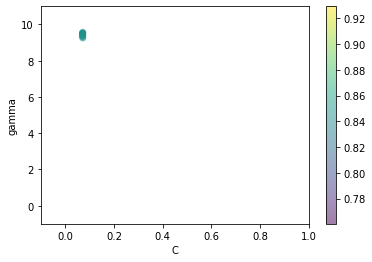

iter 43 of 50
[0.07171519 9.49875402] 0.8448844884488449
[0.07130318 9.14518443] 0.8448844884488449
[0.07083677 9.46622307] 0.8448844884488449
[0.07066341 9.47419295] 0.8448844884488449
[0.07083577 9.49027165] 0.8448844884488449
[0.07144853 9.61112029] 0.8448844884488449
[0.07103248 9.48941256] 0.8448844884488449
[0.07167377 9.45157208] 0.8448844884488449
[0.07121933 9.39078339] 0.8448844884488449
[0.07011899 9.28648652] 0.8448844884488449
best position is [0.07171519 9.49875402] best score is 0.8448844884488449


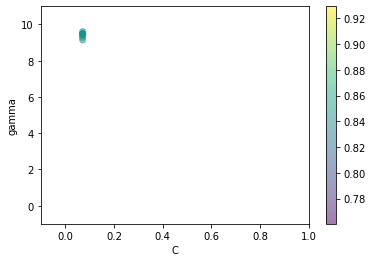

iter 44 of 50
[0.07166688 9.49765088] 0.8448844884488449
[0.07110316 9.16652586] 0.8448844884488449
[0.07061318 9.46484661] 0.8448844884488449
[0.07087327 9.47116538] 0.8448844884488449
[0.07075419 9.49212826] 0.8448844884488449
[0.07130137 9.64352522] 0.8448844884488449
[0.07087507 9.46303086] 0.8448844884488449
[0.0714901  9.45351743] 0.8448844884488449
[0.07090206 9.38327956] 0.8448844884488449
[0.07002547 9.28467986] 0.8448844884488449
best position is [0.07166688 9.49765088] best score is 0.8448844884488449


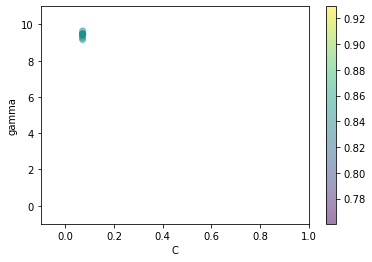

iter 45 of 50
[0.0715264  9.49931859] 0.8448844884488449
[0.07105538 9.2106624 ] 0.8448844884488449
[0.0704377 9.4623546] 0.8448844884488449
[0.07100718 9.46779836] 0.8448844884488449
[0.07074864 9.53007196] 0.8448844884488449
[0.07117427 9.60725152] 0.8448844884488449
[0.07078675 9.4223958 ] 0.8448844884488449
[0.07123176 9.45602825] 0.8448844884488449
[0.07090132 9.36411011] 0.8448844884488449
[0.070211   9.31160447] 0.8448844884488449
best position is [0.0715264  9.49931859] best score is 0.8448844884488449


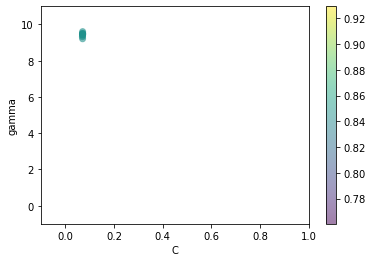

iter 46 of 50
[0.07144764 9.50273029] 0.8448844884488449
[0.07096673 9.33094931] 0.8448844884488449
[0.07037202 9.45756905] 0.8448844884488449
[0.071023   9.46497993] 0.8448844884488449
[0.07078776 9.60953845] 0.8448844884488449
[0.07111205 9.55956018] 0.8448844884488449
[0.07078561 9.38947218] 0.8448844884488449
[0.07113874 9.45781434] 0.8448844884488449
[0.07099442 9.39300709] 0.8448844884488449
[0.0703649  9.37453998] 0.8448844884488449
best position is [0.07144764 9.50273029] best score is 0.8448844884488449


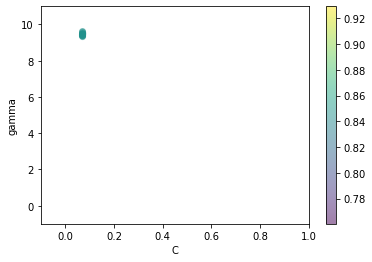

iter 47 of 50
[0.07141632 9.52165271] 0.8448844884488449
[0.0709279  9.27231922] 0.8448844884488449
[0.07032768 9.45528318] 0.8448844884488449
[0.07100838 9.46353603] 0.8448844884488449
[0.070822   9.63377053] 0.8448844884488449
[0.07105238 9.50476657] 0.8448844884488449
[0.07080297 9.39306066] 0.8448844884488449
[0.07110715 9.45560442] 0.8448844884488449
[0.07116122 9.39934234] 0.8448844884488449
[0.0705027 9.4380541] 0.8448844884488449
best position is [0.07141632 9.52165271] best score is 0.8448844884488449


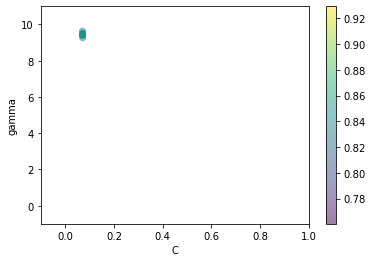

iter 48 of 50
[0.07114996 9.55289245] 0.8448844884488449
[0.07118422 9.27015951] 0.8448844884488449
[0.07037594 9.45532995] 0.8448844884488449
[0.07093757 9.46337833] 0.8448844884488449
[0.07085851 9.64481935] 0.8448844884488449
[0.07118452 9.52097914] 0.8448844884488449
[0.07089771 9.40060383] 0.8448844884488449
[0.07099667 9.45090858] 0.8448844884488449
[0.07138132 9.38375972] 0.8448844884488449
[0.07060744 9.47225973] 0.8448844884488449
best position is [0.07114996 9.55289245] best score is 0.8448844884488449


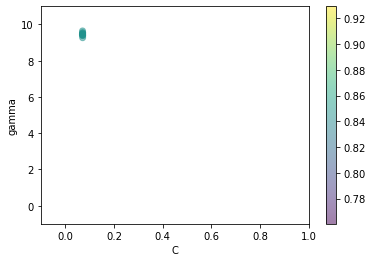

iter 49 of 50
[0.07112467 9.55232972] 0.8448844884488449
[0.07147237 9.13255899] 0.8448844884488449
[0.0704597 9.4558846] 0.8448844884488449
[0.0708595  9.46455209] 0.8448844884488449
[0.07088923 9.59734498] 0.8448844884488449
[0.07138365 9.58744037] 0.8448844884488449
[0.07105057 9.41366365] 0.8448844884488449
[0.07090279 9.44647341] 0.8448844884488449
[0.07150638 9.37474607] 0.8448844884488449
[0.07061407 9.47841901] 0.8448844884488449
best position is [0.07112467 9.55232972] best score is 0.8448844884488449


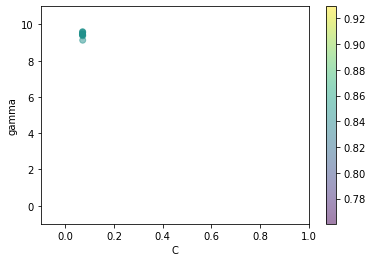

iter 50 of 50
[0.07109246 9.54870811] 0.8448844884488449
[0.07163381 8.98008872] 0.8448844884488449
[0.07047046 9.45504975] 0.8448844884488449
[0.07079463 9.46605556] 0.8448844884488449
[0.07088138 9.55581615] 0.8448844884488449
[0.07160966 9.66144747] 0.8448844884488449
[0.07117109 9.44423516] 0.8448844884488449
[0.07088243 9.45027546] 0.8448844884488449
[0.07171739 9.33692875] 0.8448844884488449
[0.07064987 9.46019425] 0.8448844884488449
best position is [0.07109246 9.54870811] best score is 0.8448844884488449


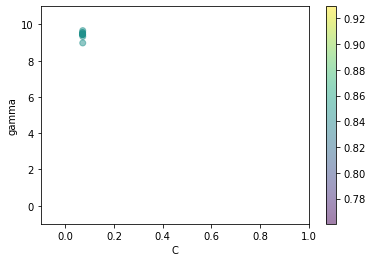

best_C and best_gamma is  [0.07080938 9.46604845] best_cost is [0.15511551]


In [15]:
pso = PSO(func=func, n_dim=psovar.n_dim, pop=psovar.pop, max_iter=psovar.max_iter, lb=psovar.lb, ub=psovar.ub, w=psovar.w, c1=psovar.c1, c2=psovar.c2)
pso.record_mode = True #记录粒子的历史位置
pso.run()#运行算法
print('best_C and best_gamma is ', pso.gbest_x, 'best_cost is', pso.gbest_y)

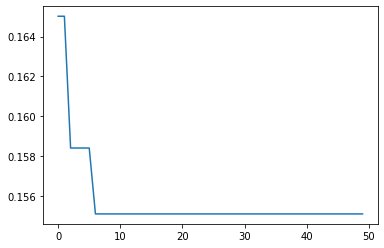

In [16]:
plt.plot(pso.gbest_y_hist)#绘制每一论损失率的折线图
plt.show()

In [17]:
clf=SVC(kernel='linear',C=pso.gbest_x[0],gamma=pso.gbest_x[1])#在pso算法找到的最优位置上测试svm的准确率
psoacc  = cross_val_score(clf, data,label, cv=3).mean()
print(psoacc)

0.8448844884488449


In [18]:
if data.shape[0] == label.shape[0]:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0',psoacc)
    text.pack()
    root.title('ops-svm预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()
else:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0','发生错误')
    text.pack()
    root.title('预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()